In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import re
import string

In [2]:
train_data = pd.read_csv("/Users/erdemsmac/Desktop/topicmodel/train.csv")
train_data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


# Data Cleaning

In [3]:
train_data = train_data.drop('id', axis='columns')
train_data.head()

,text,author
0,"This process, however, afforded me no means of...",EAP
1,It never once occurred to me that the fumbling...,HPL
2,"In his left hand was a gold snuff box, from wh...",EAP
3,How lovely is spring As we looked from Windsor...,MWS
4,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
def clean_train_data(x):
    text = x
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub(r'[^\w\s]','',text) 
    text = re.sub('\w*\d\w*', '', text) 
    text = re.sub('\n', '', text)
    return text

In [5]:
clean_data = train_data.copy()

In [6]:
clean_data['text'] = train_data.text.apply(lambda x : clean_train_data(x))
clean_data.head()

,text,author
0,this process however afforded me no means of a...,EAP
1,it never once occurred to me that the fumbling...,HPL
2,in his left hand was a gold snuff box from whi...,EAP
3,how lovely is spring as we looked from windsor...,MWS
4,finding nothing else not even gold the superin...,HPL


# Stopword Removal

In [7]:
eng_stopwords = nltk.corpus.stopwords.words("english")

In [8]:
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in eng_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [9]:
remove_stop_data = clean_data.copy()

In [10]:
remove_stop_data['text'] = clean_data.text.apply(lambda x : remove_eng_stopwords(x))
remove_stop_data.head()

,text,author
0,process however afforded means ascertaining di...,EAP
1,never occurred fumbling might mere mistake,HPL
2,left hand gold snuff box capered hill cutting ...,EAP
3,lovely spring looked windsor terrace sixteen f...,MWS
4,finding nothing else even gold superintendent ...,HPL


In [11]:
print("Before remove stopwords", len(clean_data['text'][0]))
print("After remove stopwords", len(remove_stop_data['text'][0]))

Before remove stopwords 224
After remove stopwords 154


## Find out common words

In [12]:
from itertools import chain
from collections import Counter

In [13]:
list_words = remove_stop_data['text'].str.split()
list_words_merge = list(chain(*list_words))

d = Counter(list_words_merge)
df = pd.DataFrame(data=d, index=['count'])
top_common_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_common_words.head()

,index,count
0,one,1614
1,upon,1411
2,could,1316
3,would,1241
4,man,730


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'one'),
  Text(1, 0, 'upon'),
  Text(2, 0, 'could'),
  Text(3, 0, 'would'),
  Text(4, 0, 'man'),
  Text(5, 0, 'time'),
  Text(6, 0, 'yet'),
  Text(7, 0, 'said'),
  Text(8, 0, 'even'),
  Text(9, 0, 'might'),
  Text(10, 0, 'old'),
  Text(11, 0, 'like'),
  Text(12, 0, 'first'),
  Text(13, 0, 'us'),
  Text(14, 0, 'must'),
  Text(15, 0, 'never'),
  Text(16, 0, 'made'),
  Text(17, 0, 'life'),
  Text(18, 0, 'night'),
  Text(19, 0, 'found'),
  Text(20, 0, 'seemed'),
  Text(21, 0, 'eyes'),
  Text(22, 0, 'every'),
  Text(23, 0, 'little'),
  Text(24, 0, 'still'),
  Text(25, 0, 'day'),
  Text(26, 0, 'great'),
  Text(27, 0, 'long'),
  Text(28, 0, 'saw'),
  Text(29, 0, 'many'),
  Text(30, 0, 'well'),
  Text(31, 0, 'came'),
  Text(32, 0, 'much'),
  Text(33, 0, 'may'

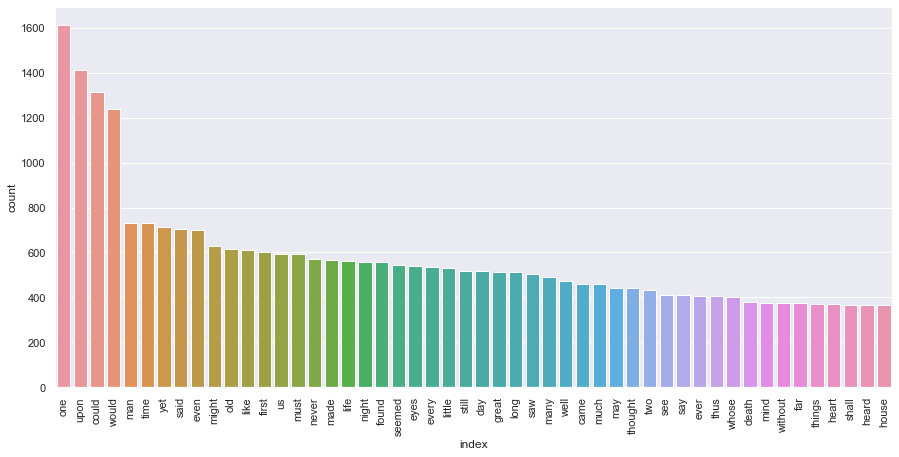

In [14]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.xticks(rotation=90)

In [15]:
common_words_value = top_common_words['index'].values
remove_words = ['man', 'life', 'night', 'house', 'heart']
new_stop_words = [x for x in common_words_value if x not in remove_words]
new_stop_words

['one',
 'upon',
 'could',
 'would',
 'time',
 'yet',
 'said',
 'even',
 'might',
 'old',
 'like',
 'first',
 'us',
 'must',
 'never',
 'made',
 'found',
 'seemed',
 'eyes',
 'every',
 'little',
 'still',
 'day',
 'great',
 'long',
 'saw',
 'many',
 'well',
 'came',
 'much',
 'may',
 'thought',
 'two',
 'see',
 'say',
 'ever',
 'thus',
 'whose',
 'death',
 'mind',
 'without',
 'far',
 'things',
 'shall',
 'heard']

In [16]:
def remove_new_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in new_stop_words]
    join_text = ' '.join(remove_stop)
    return join_text

In [17]:
new_stop_data = remove_stop_data.copy()

In [18]:
new_stop_data['text'] = remove_stop_data.text.apply(lambda x : remove_new_stopwords(x))
new_stop_data.head()

,text,author
0,process however afforded means ascertaining di...,EAP
1,occurred fumbling mere mistake,HPL
2,left hand gold snuff box capered hill cutting ...,EAP
3,lovely spring looked windsor terrace sixteen f...,MWS
4,finding nothing else gold superintendent aband...,HPL


In [19]:
print("Before remove stopwords", len(remove_stop_data['text'][4]))
print("After remove stopwords", len(new_stop_data['text'][4]))

Before remove stopwords 130
After remove stopwords 125


# EDA

Text(0.5, 1.0, 'Author text distribution')

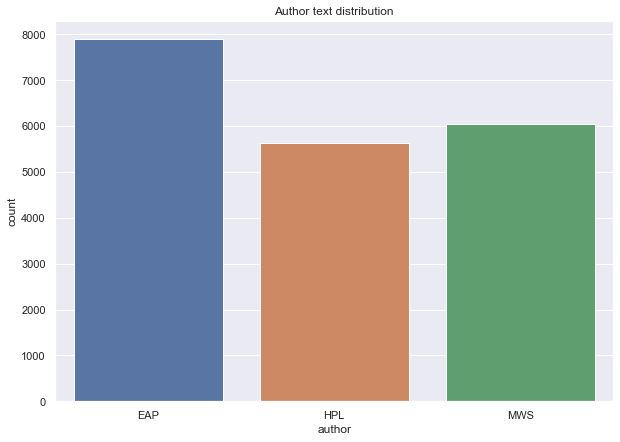

In [20]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
sns.countplot(x="author", data=train_data)
plt.title('Author text distribution')

In [21]:
all_words_after = train_data['text'].str.split()
merged = list(chain(*all_words_after))
d = Counter(merged)
df = pd.DataFrame(data=d, index=['count'])
top_count_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_count_words.head()

,index,count
0,the,33296
1,of,20851
2,and,17059
3,to,12615
4,I,10382


Text(0.5, 1.0, 'Most common words before removing stop words')

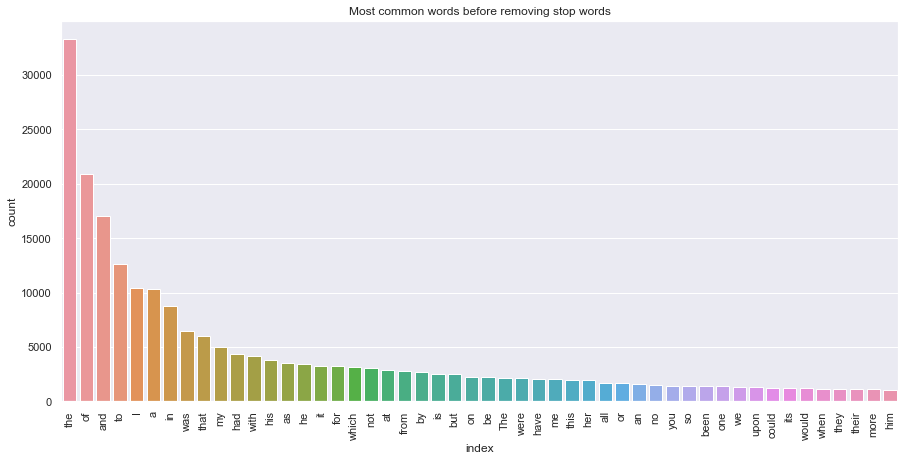

In [22]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_count_words)
plt.xticks(rotation=90)

plt.title("Most common words before removing stop words")

In [23]:
all_words_before = new_stop_data['text'].str.split()
merged = list(chain(*all_words_before))
d = Counter(merged)
df = pd.DataFrame(data=d, index=['count'])
before_top_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
before_top_words.head()

,index,count
0,man,730
1,life,562
2,night,559
3,heart,370
4,house,365


Text(0.5, 1.0, 'Most common words after removing stop words')

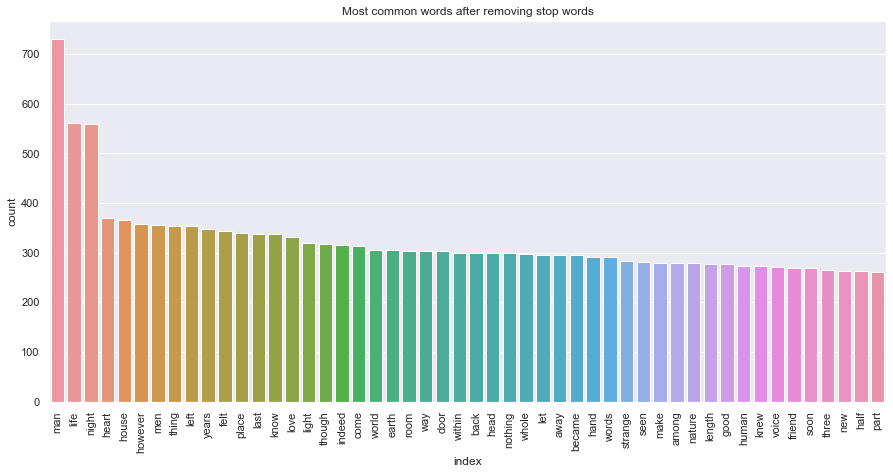

In [24]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=before_top_words)
plt.xticks(rotation=90)

plt.title("Most common words after removing stop words")

In [25]:
eap_cloud = train_data[train_data.author == 'EAP'].text.values
hpl_cloud = train_data[train_data.author == 'HPL'].text.values
mws_cloud = train_data[train_data.author == 'MWS'].text.values

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

Text(0.5, 0.63, 'All writers, word clouds before stop word removal')

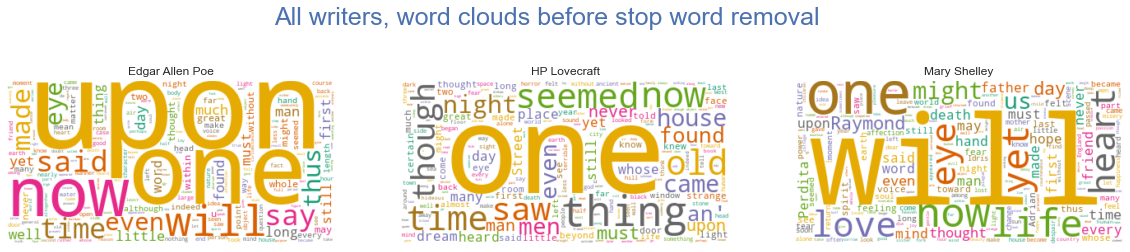

In [27]:
plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
asd = " ".join(eap_cloud)
wc.generate(asd)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title('Edgar Allen Poe')

plt.subplot(1, 3, 2)
asd = " ".join(hpl_cloud)
wc.generate(asd)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title('HP Lovecraft')

plt.subplot(1, 3, 3)
asd = " ".join(mws_cloud)
wc.generate(asd)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title('Mary Shelley')

plt.figtext(.5,.63,'All writers, word clouds before stop word removal', color='b', fontsize=25, ha='center')

In [28]:
eap_cloud_before = new_stop_data[new_stop_data.author == 'EAP'].text.values
hpl_cloud_before = new_stop_data[new_stop_data.author == 'HPL'].text.values
mws_cloud_before = new_stop_data[new_stop_data.author == 'MWS'].text.values

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

Text(0.5, 0.63, 'All writers, word clouds After stop word removal')

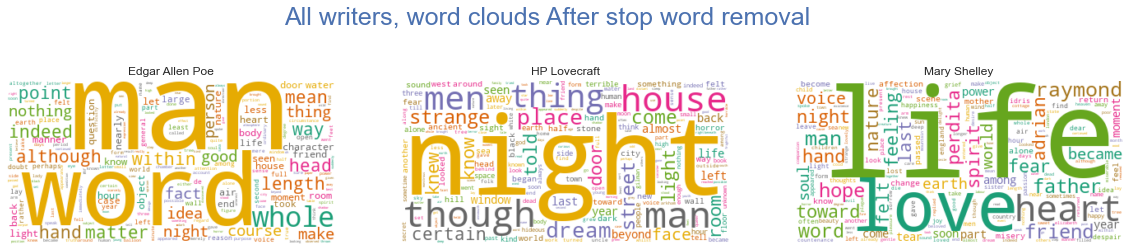

In [30]:
plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
asd = " ".join(eap_cloud_before)
wc.generate(asd)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title('Edgar Allen Poe')

plt.subplot(1, 3, 2)
asd = " ".join(hpl_cloud_before)
wc.generate(asd)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title('HP Lovecraft')

plt.subplot(1, 3, 3)
asd = " ".join(mws_cloud_before)
wc.generate(asd)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title('Mary Shelley')

plt.figtext(.5,.63,'All writers, word clouds After stop word removal', color='b', fontsize=25, ha='center')

In [31]:
full_name = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
writer_name = ['EAP', 'MWS', 'HPL']
writer_count_obj = {'writer_full_name': [], 'total_words': [], 'unique_words': []}
for name in writer_name:
    name_all_words = new_stop_data[new_stop_data.author == name].text.str.split()
    name_merged = list(chain(*name_all_words))
    name_total_len = len(name_merged)
    myset = set(name_merged)
    
    writer_count_obj['writer_full_name'].append(full_name[name])
    writer_count_obj['total_words'].append(name_total_len)
    writer_count_obj['unique_words'].append(len(myset))

In [32]:
words_df = pd.DataFrame(writer_count_obj)
words_df

,writer_full_name,total_words,unique_words
0,Edgar Allen Poe,85803,15231
1,Mary Shelley,70755,11413
2,HP Lovecraft,73191,14531


In [33]:
tidy = words_df.melt(id_vars='writer_full_name').rename(columns=str.title)
tidy

,Writer_Full_Name,Variable,Value
0,Edgar Allen Poe,total_words,85803
1,Mary Shelley,total_words,70755
2,HP Lovecraft,total_words,73191
3,Edgar Allen Poe,unique_words,15231
4,Mary Shelley,unique_words,11413
5,HP Lovecraft,unique_words,14531


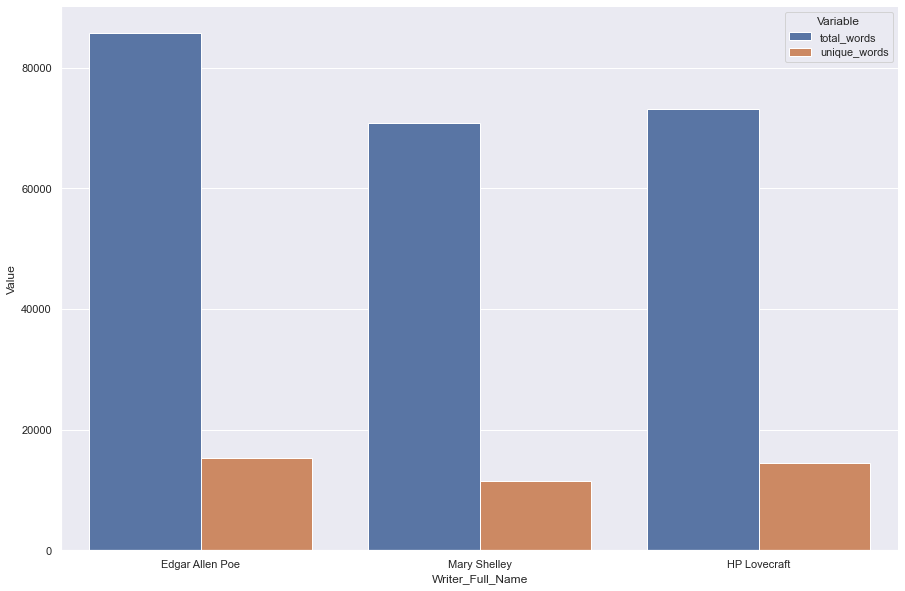

In [34]:
fig, ax1 = plt.subplots(figsize=(15, 10))
tidy = words_df.melt(id_vars='writer_full_name').rename(columns=str.title)
sns.barplot(x='Writer_Full_Name', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

# Lemmatization

In [39]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/erdemsmac/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [40]:
lemm = WordNetLemmatizer()

In [41]:
def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

In [42]:
lemmatize_data = new_stop_data.copy()
lemmatize_data['text'] = new_stop_data.text.apply(lambda x : word_lemmatizer(x))
lemmatize_data.head()

,text,author
0,process however afforded mean ascertaining dim...,EAP
1,occurred fumbling mere mistake,HPL
2,left hand gold snuff box capered hill cutting ...,EAP
3,lovely spring looked windsor terrace sixteen f...,MWS
4,finding nothing else gold superintendent aband...,HPL


# Vectorizing

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words='english')
data_count_vec = count_vec.fit_transform(lemmatize_data.text)
data_count_vec

<19579x21989 sparse matrix of type '<class 'numpy.int64'>'
	with 209651 stored elements in Compressed Sparse Row format>

In [44]:
data_count_df = pd.DataFrame(data_count_vec.toarray(), columns=count_vec.get_feature_names())
data_count_df.index = lemmatize_data.author
data_count_df

,aaem,ab,aback,abaft,abandon,abandoned,abandoning,abandonment,abaout,abased,...,æneid,ærial,æronaut,æronauts,ærostation,æschylus,élite,émeutes,οἶδα,υπνος
author,,,,,,,,,,,,,,,,,,,,,
EAP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HPL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EAP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MWS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HPL,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EAP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EAP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EAP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ----Topic modelling----

In [45]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [46]:
lda_model = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method = 'online', learning_offset = 50.,random_state = 0)

In [47]:
lda_model.fit(data_count_vec)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

In [48]:
lda_model.components_

array([[0.21679841, 0.20001513, 2.15181111, ..., 0.20578501, 0.21300566,
        0.20020234],
       [0.200007  , 1.28437074, 0.20625835, ..., 0.21843254, 2.97754314,
        0.74155247],
       [0.20001023, 0.59877767, 0.22919605, ..., 0.20393451, 0.20001242,
        0.24889887],
       [1.12804587, 0.20001839, 0.23132532, ..., 0.66004139, 0.23298574,
        0.20006211],
       [0.20000796, 0.20726303, 0.20002566, ..., 0.47275602, 0.20156897,
        0.36302757]])

In [49]:
print_words = 20
get_feature_names = count_vec.get_feature_names()
for index, topic in enumerate(lda_model.components_):
    words = " ".join([get_feature_names[i] for i in topic.argsort()[:-print_words - 1 :-1]])
    print(f"Topic - {index}:")
    print(words)
    print("-"*100)
    print('\n')

Topic - 0:
love body earth life sound nature sea dead heart soul world work water beauty mountain sun man heaven raymond deep
----------------------------------------------------------------------------------------------------


Topic - 1:
house night come door room le length strange new half street window light wall small right man away face object
----------------------------------------------------------------------------------------------------


Topic - 2:
way dream man day father fear called moon god people year wild longer secret young grew thousand adrian light star
----------------------------------------------------------------------------------------------------


Topic - 3:
left hour went matter morning mother air gave possible certain mr sense time case course table question ill box difficulty
----------------------------------------------------------------------------------------------------


Topic - 4:
life friend word let soon voice head good hand hope heart man fact t

## Topic List
1. Topic 1: sea, water
2. Topic 2: house, room
3. Topic 3: dream, star
4. Topic 4: time, table
5. Topic 5: friend, heart

# LDA with gensim 

In [50]:
from gensim import matutils, models
import scipy.sparse

/Users/erdemsmac/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [51]:
data_count_df.index.name = None
new_dtm_t_data = data_count_df.T

In [52]:
spare_counts = scipy.sparse.csr_matrix(new_dtm_t_data)
new_corpus = matutils.Sparse2Corpus(spare_counts)
new_corpus

In [53]:
cv = count_vec
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [56]:
gensim_lda_topic = models.LdaModel(corpus=new_corpus, id2word=id2word, num_topics=5, passes=10)
gensim_lda_topic.print_topics()

[(0,
  '0.005*"friend" + 0.005*"word" + 0.004*"heart" + 0.004*"raymond" + 0.004*"life" + 0.003*"spirit" + 0.003*"know" + 0.003*"good" + 0.003*"mr" + 0.003*"year"'),
 (1,
  '0.004*"body" + 0.004*"knew" + 0.004*"certain" + 0.003*"point" + 0.003*"hand" + 0.003*"room" + 0.003*"fact" + 0.003*"sound" + 0.003*"lay" + 0.003*"object"'),
 (2,
  '0.007*"door" + 0.006*"night" + 0.006*"house" + 0.004*"hour" + 0.004*"foot" + 0.003*"man" + 0.003*"half" + 0.003*"light" + 0.003*"place" + 0.003*"nearly"'),
 (3,
  '0.006*"sea" + 0.005*"tree" + 0.005*"city" + 0.004*"water" + 0.004*"wind" + 0.004*"light" + 0.004*"night" + 0.004*"thing" + 0.004*"black" + 0.003*"moon"'),
 (4,
  '0.009*"life" + 0.006*"love" + 0.005*"man" + 0.005*"nature" + 0.004*"human" + 0.003*"heart" + 0.003*"beauty" + 0.003*"feeling" + 0.003*"power" + 0.003*"gave"')]

## Topic List
1. Topic 1: friend, kind
2. Topic 2: bod
3. Topic 3: house
4. Topic 4: man, moon,sea
5. Topic 5: life, love